In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('hoteles_booking_costadorada.csv')
df.head()

,Unnamed: 0,name,price,score,address,tipo_aloj,cancelacion,habitaciones
0,0,Alannia Costa Dorada,€ 936,"7,9",Platja de l’Almadrava,Bungalow de 3 dormitorios,Cancelación gratis,Bungalow entero • 3 dormitorios • 1 sala de es...
1,1,Augustus,€ 1.460,"8,0",Cambrils,Habitación Cuádruple (2 adultos + 2 niños),Cancelación gratis,Apartamento entero • 2 dormitorios • 1 sala de...
2,2,Hotel Best Terramarina,€ 1.761,"8,3",La Pineda,Habitación Familiar (2 adultos y 2 niños),Cancelación gratis - Sin pago por adelantado,Bungalow entero • 2 dormitorios • 1 sala de es...
3,3,Golden Beach Apartamentos,€ 1.319,"9,0",Sant Carles de la Ràpita,Apartamento de 2 dormitorios,Cancelación gratis,Tienda
4,4,Hotel Best Cambrils,€ 1.322,"7,6",Cambrils,Habitación Doble (2 adultos + 2 niños),Cancelación gratis - Sin pago por adelantado,Villa entera • 5 dormitorios • 1 baño • 1 coci...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1078 non-null   int64 
 1   name          1078 non-null   object
 2   price         1078 non-null   object
 3   score         910 non-null    object
 4   address       1078 non-null   object
 5   tipo_aloj     1078 non-null   object
 6   cancelacion   934 non-null    object
 7   habitaciones  947 non-null    object
dtypes: int64(1), object(7)
memory usage: 67.5+ KB


In [4]:
df.shape

(1078, 8)

In [5]:
df.columns

Index(['Unnamed: 0', 'name', 'price', 'score', 'address', 'tipo_aloj',
       'cancelacion', 'habitaciones'],
      dtype='object')

Infomación sobre el dataset:

Fue obtenido a partir de aplicar Web Scraping con Selenium (el día 25 de marzo de 2023) a la web de viajes Booking.com, con los parametros de búsqueda de cuatro personas (dos adultos y dos niños), en la Costa Dorada de España para la semana del 03 al 09 de julio de 2023. 
Se obtuvieron las sigueintes variables:

+ Name: Nombre del alojamiento.
+ Price: Precio de la estadía expresado en euros.
+ Score: Puntuación obtenida de clientes.
+ adress: ubicación del alojamiento.
+ tipo_aloj: tipo de alojamiento. 
+ cancelacion: tipo de cancelación.
+ habitaciones:información sobre la habitacion del alojamiento.

### Limpieza del dataset.
La limpieza del dataset es un paso fundamental en el proceso de análisis de datos ya que los datos que se recolectan a menudo contienen errores, valores faltantes, datos duplicados, información irrelevante, entre otros problemas que pueden afectar la calidad y la precisión de los resultados del análisis. Por lo tanto, la limpieza de datos implica la identificación y corrección de estos problemas en el conjunto de datos para garantizar que los resultados del análisis sean confiables y precisos. Además, también ayuda a mejorar la eficiencia del análisis al reducir el tiempo y el esfuerzo requeridos para procesar datos irrelevantes o inútiles. 

#### De la variable Price , quitamos el signo de euro y convertimos el tipo de dato de object a número.

In [6]:
df[['€','Price']] = df['price'].str.rsplit(' ', 1, expand=True)
df

,Unnamed: 0,name,price,score,address,tipo_aloj,cancelacion,habitaciones,€,Price
0,0,Alannia Costa Dorada,€ 936,"7,9",Platja de l’Almadrava,Bungalow de 3 dormitorios,Cancelación gratis,Bungalow entero • 3 dormitorios • 1 sala de es...,€,936
1,1,Augustus,€ 1.460,"8,0",Cambrils,Habitación Cuádruple (2 adultos + 2 niños),Cancelación gratis,Apartamento entero • 2 dormitorios • 1 sala de...,€,1.460
2,2,Hotel Best Terramarina,€ 1.761,"8,3",La Pineda,Habitación Familiar (2 adultos y 2 niños),Cancelación gratis - Sin pago por adelantado,Bungalow entero • 2 dormitorios • 1 sala de es...,€,1.761
3,3,Golden Beach Apartamentos,€ 1.319,"9,0",Sant Carles de la Ràpita,Apartamento de 2 dormitorios,Cancelación gratis,Tienda,€,1.319
4,4,Hotel Best Cambrils,€ 1.322,"7,6",Cambrils,Habitación Doble (2 adultos + 2 niños),Cancelación gratis - Sin pago por adelantado,Villa entera • 5 dormitorios • 1 baño • 1 coci...,€,1.322
...,...,...,...,...,...,...,...,...,...,...
1073,1073,Aquamar Planet Costa Dorada ONLY FAMILIES,€ 1.686,NaN,Salou,Apartamento,Cancelación gratis,Apartamento entero • 3 dormitorios • 1 sala de...,€,1.686
1074,1074,Esquirol 3 D - ONLY FAMILIES,€ 1.260,NaN,Cambrils,Apartamento de 3 dormitorios,Cancelación gratis,Apartamento entero • 3 dormitorios • 2 baños •...,€,1.260
1075,1075,HOmes & GO Cat 92 Bloq III-2,€ 1.116,NaN,"Centro de Salou, Salou",Apartamento de 2 dormitorios,NaN,Apartamento entero • 2 dormitorios • 1 baño • ...,€,1.116
1076,1076,2 Tus vacaciones ideales en TARRAGONA,€ 744,NaN,"Centro histórico, Tarragona",Apartamento de 1 dormitorio,NaN,Apartamento entero • 1 dormitorio • 1 baño,€,744


##### Eliminamos la columna con el símbolo euros y la antigua columna Price.

In [7]:
df=df.drop(['€', 'price'], axis=1)
df.head()

,Unnamed: 0,name,score,address,tipo_aloj,cancelacion,habitaciones,Price
0,0,Alannia Costa Dorada,"7,9",Platja de l’Almadrava,Bungalow de 3 dormitorios,Cancelación gratis,Bungalow entero • 3 dormitorios • 1 sala de es...,936
1,1,Augustus,"8,0",Cambrils,Habitación Cuádruple (2 adultos + 2 niños),Cancelación gratis,Apartamento entero • 2 dormitorios • 1 sala de...,1.460
2,2,Hotel Best Terramarina,"8,3",La Pineda,Habitación Familiar (2 adultos y 2 niños),Cancelación gratis - Sin pago por adelantado,Bungalow entero • 2 dormitorios • 1 sala de es...,1.761
3,3,Golden Beach Apartamentos,"9,0",Sant Carles de la Ràpita,Apartamento de 2 dormitorios,Cancelación gratis,Tienda,1.319
4,4,Hotel Best Cambrils,"7,6",Cambrils,Habitación Doble (2 adultos + 2 niños),Cancelación gratis - Sin pago por adelantado,Villa entera • 5 dormitorios • 1 baño • 1 coci...,1.322


##### Mover la columna precio y convertirla en int64.

In [8]:
df = pd.DataFrame.reindex(df,columns = ['name', 'Price', 'score', 'address', 'tipo_aloj',
       'cancelacion', 'habitaciones'])
df.head()

,name,Price,score,address,tipo_aloj,cancelacion,habitaciones
0,Alannia Costa Dorada,936,"7,9",Platja de l’Almadrava,Bungalow de 3 dormitorios,Cancelación gratis,Bungalow entero • 3 dormitorios • 1 sala de es...
1,Augustus,1.460,"8,0",Cambrils,Habitación Cuádruple (2 adultos + 2 niños),Cancelación gratis,Apartamento entero • 2 dormitorios • 1 sala de...
2,Hotel Best Terramarina,1.761,"8,3",La Pineda,Habitación Familiar (2 adultos y 2 niños),Cancelación gratis - Sin pago por adelantado,Bungalow entero • 2 dormitorios • 1 sala de es...
3,Golden Beach Apartamentos,1.319,"9,0",Sant Carles de la Ràpita,Apartamento de 2 dormitorios,Cancelación gratis,Tienda
4,Hotel Best Cambrils,1.322,"7,6",Cambrils,Habitación Doble (2 adultos + 2 niños),Cancelación gratis - Sin pago por adelantado,Villa entera • 5 dormitorios • 1 baño • 1 coci...


In [9]:
df['Price'] = df['Price'].str.replace('.', '')
df['Price'].head()

0     936
1    1460
2    1761
3    1319
4    1322
Name: Price, dtype: object

In [10]:
df['Price'] = df['Price'].astype('int64')

In [11]:
df['Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1078 entries, 0 to 1077
Series name: Price
Non-Null Count  Dtype
--------------  -----
1078 non-null   int64
dtypes: int64(1)
memory usage: 8.5 KB


  ##### Dividimos la información de la columna tipo_aloj que en algunos registros contiene información del tipo y de la capaicidad del alojamiento.

In [12]:
df[['Tipo','Capacidad']] = df['tipo_aloj'].str.split('(', expand=True)
df[['Tipo','Capacidad']].head()

,Tipo,Capacidad
0,Bungalow de 3 dormitorios,None
1,Habitación Cuádruple,2 adultos + 2 niños)
2,Habitación Familiar,2 adultos y 2 niños)
3,Apartamento de 2 dormitorios,None
4,Habitación Doble,2 adultos + 2 niños)


###### Eliminamos la columna capacidad porque la búsqueda es para 4 personas y no en todos los alojamientos lo informa. 

In [13]:
df=df.drop(['Capacidad','tipo_aloj'], axis=1)
df.head()

,name,Price,score,address,cancelacion,habitaciones,Tipo
0,Alannia Costa Dorada,936,"7,9",Platja de l’Almadrava,Cancelación gratis,Bungalow entero • 3 dormitorios • 1 sala de es...,Bungalow de 3 dormitorios
1,Augustus,1460,"8,0",Cambrils,Cancelación gratis,Apartamento entero • 2 dormitorios • 1 sala de...,Habitación Cuádruple
2,Hotel Best Terramarina,1761,"8,3",La Pineda,Cancelación gratis - Sin pago por adelantado,Bungalow entero • 2 dormitorios • 1 sala de es...,Habitación Familiar
3,Golden Beach Apartamentos,1319,"9,0",Sant Carles de la Ràpita,Cancelación gratis,Tienda,Apartamento de 2 dormitorios
4,Hotel Best Cambrils,1322,"7,6",Cambrils,Cancelación gratis - Sin pago por adelantado,Villa entera • 5 dormitorios • 1 baño • 1 coci...,Habitación Doble


###### De la columna cancelacion, separamos la información del tipo de cancelación y del pago por adelantado. Como no todos los registros cuentan con la información sobre el pago por adelantado, eliminamos esta variable.

In [14]:
df[['Cancelacion','Pago_adelantado']] = df['cancelacion'].str.rsplit('-', 1, expand=True)
df[['Cancelacion','Pago_adelantado']].head()

,Cancelacion,Pago_adelantado
0,Cancelación gratis,None
1,Cancelación gratis,None
2,Cancelación gratis,Sin pago por adelantado
3,Cancelación gratis,None
4,Cancelación gratis,Sin pago por adelantado


In [15]:
#Eliminamos la columna anterior de cancelacion y la nueva columna creada con los registros de pago por adelantado.
df=df.drop(['cancelacion','Pago_adelantado'], axis=1)
df.head()

,name,Price,score,address,habitaciones,Tipo,Cancelacion
0,Alannia Costa Dorada,936,"7,9",Platja de l’Almadrava,Bungalow entero • 3 dormitorios • 1 sala de es...,Bungalow de 3 dormitorios,Cancelación gratis
1,Augustus,1460,"8,0",Cambrils,Apartamento entero • 2 dormitorios • 1 sala de...,Habitación Cuádruple,Cancelación gratis
2,Hotel Best Terramarina,1761,"8,3",La Pineda,Bungalow entero • 2 dormitorios • 1 sala de es...,Habitación Familiar,Cancelación gratis
3,Golden Beach Apartamentos,1319,"9,0",Sant Carles de la Ràpita,Tienda,Apartamento de 2 dormitorios,Cancelación gratis
4,Hotel Best Cambrils,1322,"7,6",Cambrils,Villa entera • 5 dormitorios • 1 baño • 1 coci...,Habitación Doble,Cancelación gratis


###### Convertimos los datos de la columna score a datos numéricos.

In [16]:
df[['decena','decimal']] = df['score'].str.split(',', expand=True)
df[['decena','decimal']].head()

,decena,decimal
0,7,9
1,8,0
2,8,3
3,9,0
4,7,6


In [17]:
df['Puntuacion'] = df['decena'].astype(str) +'.'+ df['decimal'].astype(str) 

df['Puntuacion'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1078 entries, 0 to 1077
Series name: Puntuacion
Non-Null Count  Dtype 
--------------  ----- 
1078 non-null   object
dtypes: object(1)
memory usage: 8.5+ KB


In [18]:
df['Puntuacion'] = pd.to_numeric(df['Puntuacion'], errors='coerce').fillna(0).astype('float64')
df['Puntuacion'].head()

0    7.9
1    8.0
2    8.3
3    9.0
4    7.6
Name: Puntuacion, dtype: float64

In [19]:
#Eliminamos la columna score y las dos columnas creadas para transformarla en numérica
df.drop(['score', 'decena', 'decimal'], axis=1, inplace=True)

df.head()

,name,Price,address,habitaciones,Tipo,Cancelacion,Puntuacion
0,Alannia Costa Dorada,936,Platja de l’Almadrava,Bungalow entero • 3 dormitorios • 1 sala de es...,Bungalow de 3 dormitorios,Cancelación gratis,7.9
1,Augustus,1460,Cambrils,Apartamento entero • 2 dormitorios • 1 sala de...,Habitación Cuádruple,Cancelación gratis,8.0
2,Hotel Best Terramarina,1761,La Pineda,Bungalow entero • 2 dormitorios • 1 sala de es...,Habitación Familiar,Cancelación gratis,8.3
3,Golden Beach Apartamentos,1319,Sant Carles de la Ràpita,Tienda,Apartamento de 2 dormitorios,Cancelación gratis,9.0
4,Hotel Best Cambrils,1322,Cambrils,Villa entera • 5 dormitorios • 1 baño • 1 coci...,Habitación Doble,Cancelación gratis,7.6


In [20]:
print(df.isnull().sum())

name              0
Price             0
address           0
habitaciones    131
Tipo              0
Cancelacion     144
Puntuacion        0
dtype: int64


In [21]:
print(df.isna().sum())

name              0
Price             0
address           0
habitaciones    131
Tipo              0
Cancelacion     144
Puntuacion        0
dtype: int64


In [22]:
df['habitaciones']

0       Bungalow entero • 3 dormitorios • 1 sala de es...
1       Apartamento entero • 2 dormitorios • 1 sala de...
2       Bungalow entero • 2 dormitorios • 1 sala de es...
3                                                  Tienda
4       Villa entera • 5 dormitorios • 1 baño • 1 coci...
                              ...                        
1073    Apartamento entero • 3 dormitorios • 1 sala de...
1074    Apartamento entero • 3 dormitorios • 2 baños •...
1075    Apartamento entero • 2 dormitorios • 1 baño • ...
1076           Apartamento entero • 1 dormitorio • 1 baño
1077                                                  NaN
Name: habitaciones, Length: 1078, dtype: object

In [23]:
# Reemplazamos los valores nulos y faltantes con un valor predeterminado (por ejemplo, 0)
df.fillna(0, inplace=True)

In [24]:
#Separamos los datos de  la columna habitaciones 
df[['tipo_alojamiento', 'num_dormitorios', 'comodidades']] = df['habitaciones'].str.split('•', n=2, expand=True).apply(np.nan_to_num)
df.head()

,name,Price,address,habitaciones,Tipo,Cancelacion,Puntuacion,tipo_alojamiento,num_dormitorios,comodidades
0,Alannia Costa Dorada,936,Platja de l’Almadrava,Bungalow entero • 3 dormitorios • 1 sala de es...,Bungalow de 3 dormitorios,Cancelación gratis,7.9,Bungalow entero,3 dormitorios,1 sala de estar • 1 baño • 29m²
1,Augustus,1460,Cambrils,Apartamento entero • 2 dormitorios • 1 sala de...,Habitación Cuádruple,Cancelación gratis,8.0,Apartamento entero,2 dormitorios,1 sala de estar • 2 baños • 1 cocina • 90m²
2,Hotel Best Terramarina,1761,La Pineda,Bungalow entero • 2 dormitorios • 1 sala de es...,Habitación Familiar,Cancelación gratis,8.3,Bungalow entero,2 dormitorios,1 sala de estar • 1 baño • 1 cocina • 30m²
3,Golden Beach Apartamentos,1319,Sant Carles de la Ràpita,Tienda,Apartamento de 2 dormitorios,Cancelación gratis,9.0,Tienda,None,None
4,Hotel Best Cambrils,1322,Cambrils,Villa entera • 5 dormitorios • 1 baño • 1 coci...,Habitación Doble,Cancelación gratis,7.6,Villa entera,5 dormitorios,1 baño • 1 cocina • 220m²


In [25]:
#Eliminamos la columna habitaciones 
df.drop(['habitaciones'], axis=1, inplace=True)

df.head()

,name,Price,address,Tipo,Cancelacion,Puntuacion,tipo_alojamiento,num_dormitorios,comodidades
0,Alannia Costa Dorada,936,Platja de l’Almadrava,Bungalow de 3 dormitorios,Cancelación gratis,7.9,Bungalow entero,3 dormitorios,1 sala de estar • 1 baño • 29m²
1,Augustus,1460,Cambrils,Habitación Cuádruple,Cancelación gratis,8.0,Apartamento entero,2 dormitorios,1 sala de estar • 2 baños • 1 cocina • 90m²
2,Hotel Best Terramarina,1761,La Pineda,Habitación Familiar,Cancelación gratis,8.3,Bungalow entero,2 dormitorios,1 sala de estar • 1 baño • 1 cocina • 30m²
3,Golden Beach Apartamentos,1319,Sant Carles de la Ràpita,Apartamento de 2 dormitorios,Cancelación gratis,9.0,Tienda,None,None
4,Hotel Best Cambrils,1322,Cambrils,Habitación Doble,Cancelación gratis,7.6,Villa entera,5 dormitorios,1 baño • 1 cocina • 220m²


In [26]:
print(df.isna().sum())

name                  0
Price                 0
address               0
Tipo                  0
Cancelacion           0
Puntuacion            0
tipo_alojamiento    131
num_dormitorios     138
comodidades         139
dtype: int64


Cambiamos los registros NaN de la variable Cancelación por No , interpretando que ese alojamiento no cuenta con politica de cancelación gratuita.
De la variables tipo_ajamiento, num_dormitorios y comodidades reemplazamos los NaN y None por Sin Información. 


In [27]:
df['Cancelacion'] = df['Cancelacion'].fillna('No')
df['tipo_alojamiento'] = df['tipo_alojamiento'].fillna('Sin Información')
df['num_dormitorios'] = df['num_dormitorios'].fillna('Sin Información')
df['comodidades'] = df['comodidades'].fillna('Sin Información')
df

,name,Price,address,Tipo,Cancelacion,Puntuacion,tipo_alojamiento,num_dormitorios,comodidades
0,Alannia Costa Dorada,936,Platja de l’Almadrava,Bungalow de 3 dormitorios,Cancelación gratis,7.9,Bungalow entero,3 dormitorios,1 sala de estar • 1 baño • 29m²
1,Augustus,1460,Cambrils,Habitación Cuádruple,Cancelación gratis,8.0,Apartamento entero,2 dormitorios,1 sala de estar • 2 baños • 1 cocina • 90m²
2,Hotel Best Terramarina,1761,La Pineda,Habitación Familiar,Cancelación gratis,8.3,Bungalow entero,2 dormitorios,1 sala de estar • 1 baño • 1 cocina • 30m²
3,Golden Beach Apartamentos,1319,Sant Carles de la Ràpita,Apartamento de 2 dormitorios,Cancelación gratis,9.0,Tienda,Sin Información,Sin Información
4,Hotel Best Cambrils,1322,Cambrils,Habitación Doble,Cancelación gratis,7.6,Villa entera,5 dormitorios,1 baño • 1 cocina • 220m²
...,...,...,...,...,...,...,...,...,...
1073,Aquamar Planet Costa Dorada ONLY FAMILIES,1686,Salou,Apartamento,Cancelación gratis,0.0,Apartamento entero,3 dormitorios,1 sala de estar • 2 baños • 1 cocina • 80m²
1074,Esquirol 3 D - ONLY FAMILIES,1260,Cambrils,Apartamento de 3 dormitorios,Cancelación gratis,0.0,Apartamento entero,3 dormitorios,2 baños • 110m²
1075,HOmes & GO Cat 92 Bloq III-2,1116,"Centro de Salou, Salou",Apartamento de 2 dormitorios,0,0.0,Apartamento entero,2 dormitorios,1 baño • 1 cocina • 55m²
1076,2 Tus vacaciones ideales en TARRAGONA,744,"Centro histórico, Tarragona",Apartamento de 1 dormitorio,0,0.0,Apartamento entero,1 dormitorio,1 baño


### Visualización

In [28]:
df['address'].value_counts().nlargest(10) #Las 10 ciudades con más oferta de alojamientos

Centro de Salou, Salou         214
Cambrils                       126
Salou                          114
Tarragona                       68
Deltebre                        59
La Pineda                       59
Miami Platja                    58
Sant Carles de la Ràpita        45
Calafell                        35
Centro histórico, Tarragona     35
Name: address, dtype: int64

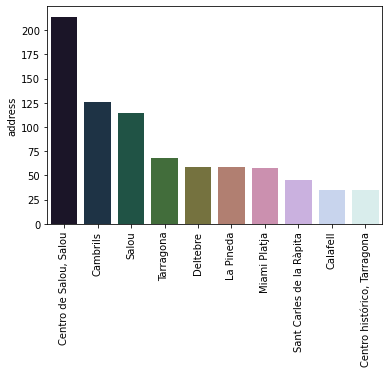

In [29]:
sns.barplot(x = df['address'].value_counts().nlargest(10).index,y = df['address'].value_counts().nlargest(10),palette='cubehelix')
plt.xticks(rotation = 90);

Se puede observar que la oferta de alojamientos en la Costa Dorada se concentra mayoritariamente en la zona de Salou y Cambrils. 

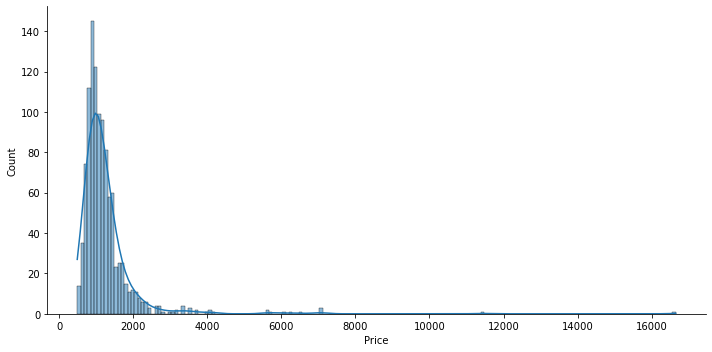

In [30]:
sns.displot(data = df, x = 'Price',height=5, aspect = 10/5,kde = True);#Precios 

Se observa que los precios de los alojamientos se concentran en un rango de no superior a 2.000 euros por toda la estancia pars 4 personas, pero también se pueden observar precios muy superiores a la media, por lo que realizaremos otros tipos de análisis y gráficos para mejor comprensión.

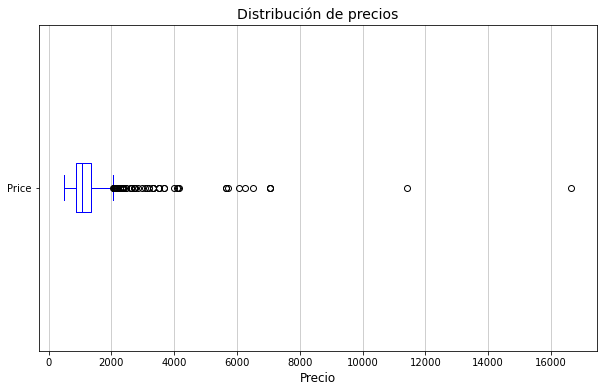

In [31]:
# Generar el gráfico de caja 
fig, ax = plt.subplots(figsize=(10,6)) # establecer tamaño de figura
df.Price.plot(kind='box', ax=ax, color='blue', vert=False) # establecer color y orientación

# Personalizar el gráfico con Matplotlib
ax.set_title('Distribución de precios', fontsize=14)
ax.set_xlabel('Precio', fontsize=12)
ax.grid(axis='x', alpha=0.75)

plt.show()

En este gráfico podemos apreciar que la variable Price contiene outliers significativos.

<Figure size 720x360 with 0 Axes>

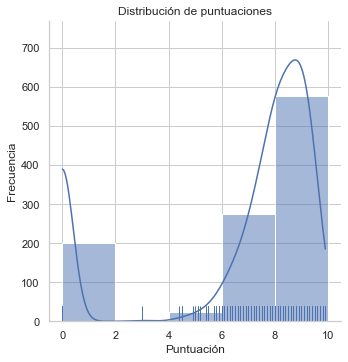

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.displot(data=df, x='Puntuacion', kde=True, palette='rocket', 
                 binwidth=2, rug=True, rug_kws={'height':0.05}, 
                 kde_kws={'bw_adjust':0.5})

ax.set(title='Distribución de puntuaciones', xlabel='Puntuación', ylabel='Frecuencia')
plt.show()

In [33]:
num_zeros = df['Puntuacion'].value_counts()[0] #Cantidad de alojamientos sin Puntuación
num_zeros

201

En este gráfico podemos observar que la gran mayoría de alojamientos con puntuación , se encuentran entre un 8 y un 10 de puntuación. 
También se observa en este gráfico que existen 201 alojamientos de la muestra que no tienen puntuación. 

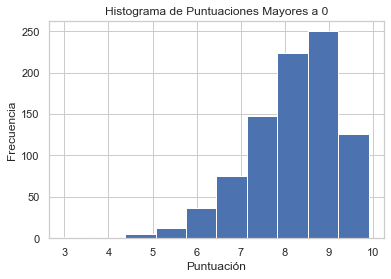

In [34]:
#Generamos una visualización de la frecuencia de las puntuaciones solo de los alojamientos que tienen valoraciónpor parte de los usuarios. 

df_filtered = df[df['Puntuacion'] > 0]

# Generar el histograma 
plt.hist(df_filtered['Puntuacion'])

# Personalizar el gráfico
plt.title('Histograma de Puntuaciones Mayores a 0')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.show()

In [35]:
#Reemplazamos los 0 de la columna Puntuación por su valor promedio.
df['Puntuacion'] = df['Puntuacion'].replace(0, df['Puntuacion'][df['Puntuacion'] != 0].mean())


              Price   Puntuacion
count   1078.000000  1078.000000
mean    1247.216141     8.214139
std      883.031118     0.917398
min      490.000000     3.000000
25%      877.000000     7.800000
50%     1061.000000     8.214139
75%     1344.000000     8.900000
max    16648.000000     9.900000


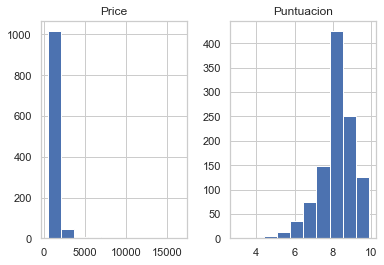

In [36]:
print(df.describe())
df.hist()
plt.show()

La función describe() proporciona un resumen estadístico de un DataFrame numérico, que incluye información sobre la distribución, la centralidad y la dispersión de los datos.
La columna "Price" representa los precios  y la columna "Puntuacion" representa las puntuaciones de los alojamientos.
Según los resultdos del resumen estadístico sugiere que los precios de los alojamientos varían ampliamente, desde un mínimo de 490 hasta un máximo de 16648, y tienen una desviación estándar bastante grande. La puntuación de los alojamientos también varía ampliamente, desde un mínimo de 0 hasta un máximo de 9.9, y tiene una desviación estándar más pequeña que la del precio.La puntuación de 0 podría deberse a que el alijamiento es nuevo o su publicación es nueva y ningún usuario lo ha utilizado o puntuado, ya que la puntuación es opcional para el cliente.
La mediana de los precios y las puntuaciones es bastante baja en comparación con sus respectivas medias, lo que sugiere que las distribuciones podrían ser sesgadas hacia valores más bajos. Además, la mayoría de los alojamientos tienen una puntuación de 8 o más, lo que sugiere que la satisfacción general de los clientes es bastante alta.

In [37]:
# Variables cualitativas (tipo object)

df.select_dtypes(include=['object']).describe()

,name,address,Tipo,Cancelacion,tipo_alojamiento,num_dormitorios,comodidades
count,1078,1078,1078,1078,1078,1078,1078
unique,880,47,121,3,10,14,275
top,Mas de Josep,"Centro de Salou, Salou",Apartamento de 2 dormitorios,Cancelación gratis,Apartamento entero,2 dormitorios,Sin Información
freq,4,214,233,781,747,404,139


In [38]:
# Análisis de correlación
corr_matrix = df.corr()
print(corr_matrix)

               Price  Puntuacion
Price       1.000000    0.034942
Puntuacion  0.034942    1.000000


La función .corr() se utiliza para calcular la correlación entre las diferentes columnas de un conjunto de datos. La correlación es una medida estadística que indica la fuerza y dirección de la relación lineal entre dos variables. Los valores de correlación oscilan entre -1 y 1.
El valor de correlación entre "Price" y "Puntuacion" es de -0.036419. Este valor indica que no hay una fuerte relación lineal entre las dos variables, ya que la correlación es cercana a cero. Además, como el valor es negativo, indica que las dos variables están inversamente relacionadas, lo que significa que cuando una variable aumenta, la otra disminuye y viceversa.



In [39]:
# Correlación entre columnas numéricas

def tidy_corr_matrix(corr_mat):
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
1,Price,Puntuacion,0.034942,0.034942
2,Puntuacion,Price,0.034942,0.034942


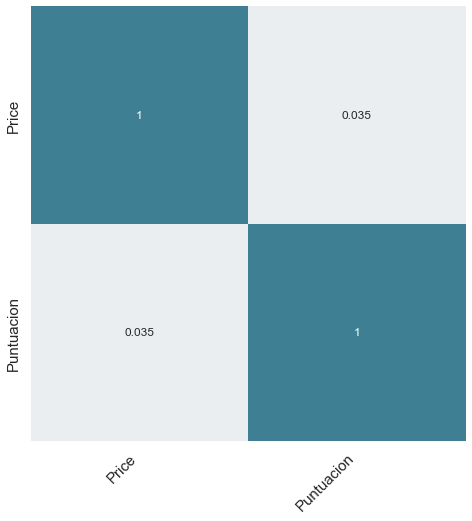

In [40]:
# Heatmap matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 12},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 15)

In [41]:
corr = df.corr()
corr[['Price']].sort_values(by = 'Price',ascending = False).style.background_gradient()

,Price
Price,1.000000
Puntuacion,0.034942


Se puede apreciar que las variables Price y Puntuacion están ligeramente correladas.

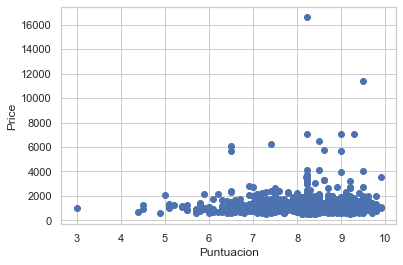

In [42]:
# Gráfico de dispersión entre Price y Puntuación
plt.scatter(df["Puntuacion"], df["Price"])
plt.xlabel("Puntuacion")
plt.ylabel("Price")
plt.show()

El gráfico de dispersión proporciona información sobre la relación entre las dos variables Puntuacion y Precio. 

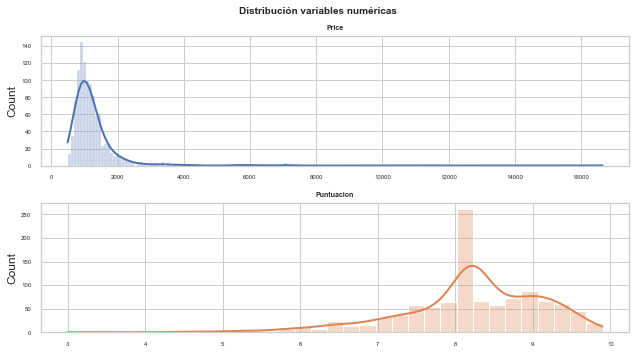

In [43]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns


for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = df,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [44]:
# Asimetría y curtosis:
print("Skewness: %f" % df['Price'].skew())
print("Kurtosis: %f" % df['Price'].kurt())

Skewness: 8.352496
Kurtosis: 110.687288


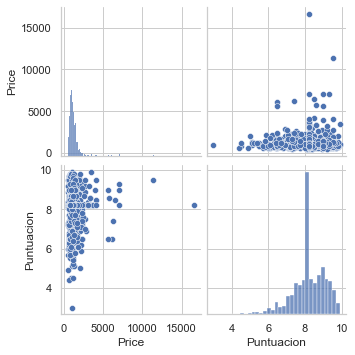

In [45]:
sns.pairplot(df, diag_kind="hist")

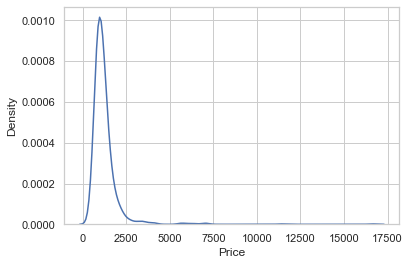

In [46]:
sns.kdeplot(df['Price'])
plt.show()

Este gráfico permite visualizar la distribución de los precios de los alojamientos. Se puede apreciar una desviación con respecto a la distribución normal.

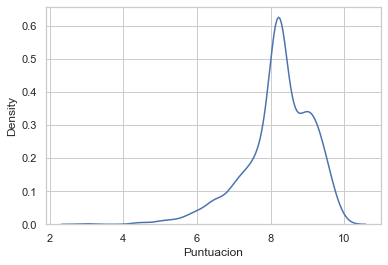

In [47]:
sns.kdeplot(df['Puntuacion'])
plt.show()

Este gráfico permite visualizar la distribución de las puntuaciones de los alojamientos. Se puede apreciar una desviación con respecto a la distribución normal y algunos picos.

#### Realizaremos un mapa señalando las ubicaciones de los alojamientos utilizando para ello la galeria de Python Folium.

In [48]:
print(df['address'].unique())

['Platja de l’Almadrava' 'Cambrils' 'La Pineda' 'Sant Carles de la Ràpita'
 "L'Ampolla" 'Tamarit' 'Salou' "L'Ametlla de Mar" 'Torredembarra'
 'Mont-roig' 'Comarruga' 'El Perelló' 'Tarragona' "Hospitalet de l'Infant"
 'Centro de Salou, Salou' 'El Lligallo del Gànguil' 'Segur de Calafell'
 'Calafell' 'Deltebre' 'Miami Platja' 'Riumar' 'Montbrió del Camp' 'Valls'
 'El Poble Nou del Delta' 'Ferrán' "Les Cases d'Alcanar" 'Reus' 'Cunit'
 'Altafulla' 'El Vendrell' 'Creixell' "L'Eucaliptus" "Sant Jaume d'Enveja"
 'Centro histórico, Tarragona' 'Alcanar' 'Els Muntells' 'Camarles'
 'Vila-seca' 'La Cava' 'Bonmont Terres Noves' 'Les tres Cales' 'Calafat'
 'Vinyols i els Arcs' 'Vilafortuny' 'Mas Boquera' 'Roda de Bará' 'La Mora']


In [49]:
import folium
from geopy.geocoders import Nominatim

# Creamos un mapa centrado en España
m = folium.Map(location=[40.4168, -3.7038], zoom_start=7)

# Creamos un objeto geolocalizador
geolocator = Nominatim(user_agent='myapplication')

# Creamos una lista con las ciudades donde se encuentran los alojamientos
ciudades =(df['address'].unique())

# Recorremos la lista de ciudades y agregamos un marcador para cada una
for ciudad in ciudades:
    try:
        # Obtenemos las coordenadas geográficas de la ciudad
        location = geolocator.geocode(ciudad + ', España')
        # Añadimos un marcador para la ciudad en el mapa
        folium.Marker(location=[location.latitude, location.longitude], popup=ciudad).add_to(m)
    except:
        print(f"No se pudo obtener la ubicación de {ciudad}")

# Mostramos el mapa
m

No se pudo obtener la ubicación de Centro de Salou, Salou
No se pudo obtener la ubicación de El Lligallo del Gànguil
No se pudo obtener la ubicación de El Poble Nou del Delta
No se pudo obtener la ubicación de Centro histórico, Tarragona


Se observa que no se encuentran lugares como Centro  de Salou y Centro Histórico de Tarragona por lo que modificaremos el registro ya que la ubicación en sí es la ciudad. Modificamos además El Poblenou del Delta porque separado no lo encuentra y El Lligallo del Gangil lo ubica sin 'El'.

In [50]:
# Reemplazar 'Centro de Salou, Salou' por 'Salou' 
df['address'] = df['address'].replace('Centro de Salou, Salou', 'Salou')

In [51]:
#Reemplazar 'Centro histórico, Tarragona' por 'Tarragona'
df['address'] = df['address'].replace('Centro histórico, Tarragona','Tarragona')

In [52]:
#Reemplazamos El Poble Nou del Delta por El PobleNou del Delta
df['address'] = df['address'].replace('El Poble Nou del Delta','El PobleNou del Delta')

In [53]:
df['address'] = df['address'].replace('El Lligallo del Gànguil','Lligallo del Ganguil')

In [54]:
import folium
from geopy.geocoders import Nominatim

# Creamos un mapa centrado en España
m = folium.Map(location=[40.4168, -3.7038], zoom_start=7)

# Creamos un objeto geolocalizador
geolocator = Nominatim(user_agent='myapplication')

# Creamos una lista con las ciudades donde se encuentran los alojamientos
ciudades =(df['address'].unique())

# Recorremos la lista de ciudades y agregamos un marcador para cada una
for ciudad in ciudades:
    try:
        # Obtenemos las coordenadas geográficas de la ciudad
        location = geolocator.geocode(ciudad + ', España')
        # Añadimos un marcador para la ciudad en el mapa
        folium.Marker(location=[location.latitude, location.longitude], popup=ciudad).add_to(m)
    except:
        print(f"No se pudo obtener la ubicación de {ciudad}")

# Mostramos el mapa
m

Se observan puntos en el mapa fuera de la Costa Dorada. 

##### Top 10 de los alojamientos mejor puntuados por los clientes.

In [55]:
from tabulate import tabulate
df_sorted = df.sort_values('Puntuacion', ascending=False)
top_10_names = df_sorted.head(10)[['name', 'address', 'Puntuacion']]
print(tabulate(top_10_names, headers='keys', tablefmt='psql'))


+-----+--------------------------------------------------+---------------------+--------------+
|     | name                                             | address             |   Puntuacion |
|-----+--------------------------------------------------+---------------------+--------------|
| 650 | Apartaments Lauria                               | Tarragona           |          9.9 |
| 640 | Holiday Home El Romani                           | Calafell            |          9.9 |
| 635 | Mediterranean Way - Uolas                        | Salou               |          9.9 |
| 582 | Doree 540                                        | Miami Platja        |          9.8 |
| 512 | Mas Illa de Riu                                  | Sant Jaume d'Enveja |          9.8 |
| 507 | Casa Arques                                      | Deltebre            |          9.8 |
| 793 | Apartamento en primera linea de mar              | L'Ampolla           |          9.8 |
| 997 | Desvalls                        

In [56]:
# Creamos un mapa centrado en España
m = folium.Map(location=[40.4168, -3.7038], zoom_start=7)

# Creamos un objeto geolocalizador
geolocator = Nominatim(user_agent='myapplication')

# Creamos una lista con las ciudades donde se encuentran los alojamientos
ciudades =(top_10_names['address'])

# Recorremos la lista de ciudades y agregamos un marcador para cada una
for ciudad in ciudades:
    try:
        # Obtenemos las coordenadas geográficas de la ciudad
        location = geolocator.geocode(ciudad + ', España')
        # Añadimos un marcador para la ciudad en el mapa
        folium.Marker(location=[location.latitude, location.longitude], popup=ciudad).add_to(m)
    except:
        print(f"No se pudo obtener la ubicación de {ciudad}")

# Mostramos el mapa
m

In [57]:
# Missing data:

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
name,0,0.0
Price,0,0.0
address,0,0.0
Tipo,0,0.0
Cancelacion,0,0.0
Puntuacion,0,0.0
tipo_alojamiento,0,0.0
num_dormitorios,0,0.0
comodidades,0,0.0


In [58]:
df.isnull().values.any()

False

In [59]:
df.isna().values.any()

False

No hay valores nulos ni datos anómalos.

In [60]:
#Registros duplicados
df[df.duplicated()].count()

name                11
Price               11
address             11
Tipo                11
Cancelacion         11
Puntuacion          11
tipo_alojamiento    11
num_dormitorios     11
comodidades         11
dtype: int64

In [61]:
#Eliminamos los registros duplicados
df= df.drop_duplicates()

In [62]:
#Comprobamos que no queden registros duplicados
df[df.duplicated()].count()

name                0
Price               0
address             0
Tipo                0
Cancelacion         0
Puntuacion          0
tipo_alojamiento    0
num_dormitorios     0
comodidades         0
dtype: int64

###### Creamos una copia del dataset para poder transformarlo y eliminar las columnas que no se utilizan para aplicar modelos sin perderlas.

In [63]:
df_copy = df.copy()

### Preprocesado

##### Shapiro-Wilk Normality Test
A las variables númericas les aplicamos el test de Shapiro-Wilk que es una prueba estadística utilizada para evaluar si un conjunto de datos sigue una distribución normal. La prueba determina si la distribución de los datos es simétrica y en forma de campana o si difiere significativamente de una distribución normal.

+ α=0,05
+ H0: la muestra tiene una distribución gaussiana.
+ H1: la muestra no tiene distribución gaussiana.

In [64]:
from scipy import stats

for col in ['Price', 'Puntuacion']:
    shapiro_test = stats.shapiro(df_copy[col])
    print(col, 'tiene un p-value=', shapiro_test.pvalue)
    if shapiro_test.pvalue > 0.05:
        print('Se acepta la hipotesis nula, probablemente Gaussiana.')
    else:
        print('Se rechaza la hipotesis nula, probablemente no Gaussiana.')


Price tiene un p-value= 0.0
Se rechaza la hipotesis nula, probablemente no Gaussiana.
Puntuacion tiene un p-value= 5.3097200117983345e-21
Se rechaza la hipotesis nula, probablemente no Gaussiana.


Verificamos si las variables Probablemente No Gaussianas contienen outliers.

In [65]:
# Porcentaje de outliers en cada variable
for col in ['Price', 'Puntuacion']:
    q1 = df_copy[col].quantile(0.25)
    q3 = df_copy[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df_copy[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)]
    perc_outliers = len(outliers) / len(df) * 100
    print(f"La variable {col} tiene {perc_outliers}% de outliers")


La variable Price tiene 6.373008434864105% de outliers
La variable Puntuacion tiene 3.373945641986879% de outliers


###### La variable Price es nuestro Target, por lo que aplicamos RobustScaler en la variable numérica probablemente No Gaussiana y con outliers 'Puntuacion'.

In [66]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

columnsRobust = ['Puntuacion']
scaler = preprocessing.RobustScaler().fit(df_copy[columnsRobust])
df_copy[columnsRobust] = scaler.transform(df_copy[columnsRobust])

###### A las variables categóricas les aplicamos Dummy

In [67]:
print(df_copy['Cancelacion'].unique())

['Cancelación gratis' 'Cancelación gratis ' 0]


In [68]:
df_copy['Cancelacion'] = df_copy['Cancelacion'].replace('Cancelación gratis ','Cancelación gratis')

In [69]:
df_cancelacion = pd.get_dummies(df_copy['Cancelacion'], prefix='Cancelacion')
#Unimos el nuevo dataframe de dummy encoding al dataframe original
df_copy= pd.concat([df_copy.drop('Cancelacion', axis=1), df_cancelacion], axis=1)

In [70]:
print(df_copy['tipo_alojamiento'].unique())

['Bungalow entero ' 'Apartamento entero ' 'Tienda' 'Villa entera '
 'Sin Información' 'Suite privada' 'Casa o chalet entero '
 'Estudio entero ' 'Suite privada ' 'Chalet de montaña entero ']


In [71]:
df_copy['tipo_alojamiento'] = df_copy['tipo_alojamiento'].replace('Suite privada ','Suite privada')

In [72]:
# Contamos los registros 'Sin Informacion' en la columna 'tipo_alojamiento'
sin_info_count = df_copy['tipo_alojamiento'].value_counts()['Sin Información']
print("Número de registros 'Sin Información':", sin_info_count)

Número de registros 'Sin Información': 129


In [73]:
df_tipo = pd.get_dummies(df_copy['tipo_alojamiento'], prefix='tipo_alojamiento')

df_copy= pd.concat([df_copy.drop('tipo_alojamiento', axis=1), df_tipo], axis=1)

Eliminamos la columna 'Tipo' ya que contiene infomación que se encuentra más resumida en otra columna llamada tipo_alojamiento que hemos aplicado Dummies y la columna 'comodidades' porque contiene mucha información muy particular de cada alojamiento.

In [74]:
df_copy= df_copy.drop(['Tipo', 'comodidades'], axis=1)

In [75]:
df_copy= df_copy.drop(['num_dormitorios'], axis=1)

In [76]:
df_copy= df_copy.drop(['name','address'], axis=1)

In [77]:
df_copy.head()

,Price,Puntuacion,Cancelacion_0,Cancelacion_Cancelación gratis,tipo_alojamiento_Apartamento entero,tipo_alojamiento_Bungalow entero,tipo_alojamiento_Casa o chalet entero,tipo_alojamiento_Chalet de montaña entero,tipo_alojamiento_Estudio entero,tipo_alojamiento_Sin Información,tipo_alojamiento_Suite privada,tipo_alojamiento_Tienda,tipo_alojamiento_Villa entera
0,936,-0.285581,0,1,0,1,0,0,0,0,0,0,0
1,1460,-0.194672,0,1,1,0,0,0,0,0,0,0,0
2,1761,0.078055,0,1,0,1,0,0,0,0,0,0,0
3,1319,0.714419,0,1,0,0,0,0,0,0,0,1,0
4,1322,-0.558308,0,1,0,0,0,0,0,0,0,0,1


##### División entre Features y Target.
Evaluar la capacidad predictiva de un modelo consiste en comprobar cómo de próximas son sus predicciones a los verdaderos valores de la variable respuesta. Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de test. El tamaño adecuado de las particiones depende en gran medida de la cantidad de datos disponibles y la seguridad que se necesite en la estimación del error, 80%-20% suele dar buenos resultados. El reparto debe hacerse de forma aleatoria o aleatoria-estratificada.

In [78]:
#Features
X = df_copy.drop('Price',axis=1)
X.shape

(1067, 12)

In [79]:
#Target---> columna "Price"
y = df_copy[['Price']]
y.shape

(1067, 1)

In [80]:
#Training And Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.80)
X_train.shape

(853, 12)

##### Regresión lineal simple

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
#Entrenamos el modelo RL 
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [83]:
# 5 Predicciones
y_pred = lr.predict(X_test)
print(y_pred [0:5])

[[1178.41738359]
 [1150.36002687]
 [1150.09975556]
 [1169.06493135]
 [1201.79851419]]


In [84]:
print("Coeficientes: \n", lr.coef_)

Coeficientes: 
 [[  51.43848732  -24.94101265   24.94101265 -321.58761414 -384.67715056
  -148.82751901 -130.89134771  -25.72631937 -317.48835685 -133.78575407
  -452.64278982 1915.62685154]]


In [85]:
prediccion = pd.DataFrame(y_pred, columns = ['PREDICCION-LR'])
prediccion.head()

,PREDICCION-LR
0,1178.417384
1,1150.360027
2,1150.099756
3,1169.064931
4,1201.798514


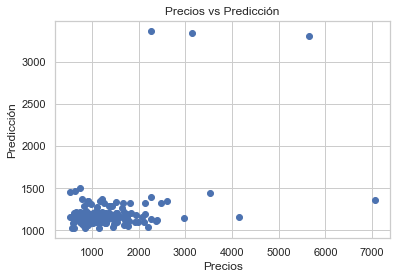

In [86]:
plt.scatter(y_test, y_pred)  
plt.xlabel('Precios')  
plt.ylabel('Predicción') 
plt.title('Precios vs Predicción') 
plt.show()

In [87]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [88]:
#Valor de la variable de respuesta cuando todas las variables explicativas o predictoras son cero.
lr.intercept_

array([1447.66780514])

###### Random Forest

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rf = RandomForestRegressor()

In [91]:
#Entrenamos el modelo Random Forest
rf.fit(X_train, y_train)

RandomForestRegressor()

In [92]:
# 5 Predicciones
pred_rf = rf.predict(X_test) 
print(pred_rf [0:5])

[1072.76864671  998.67263409 1678.02       1292.33604136  990.75428664]


In [93]:
prediccion_rf = pd.DataFrame(pred_rf, columns = ['PREDICCION-RF'])
prediccion_rf .head()

,PREDICCION-RF
0,1072.768647
1,998.672634
2,1678.020000
3,1292.336041
4,990.754287


In [94]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

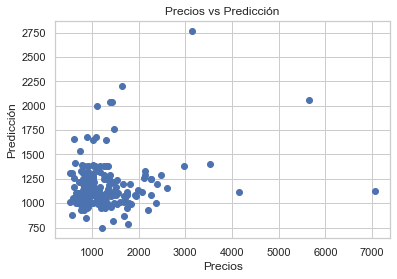

In [95]:
plt.scatter(y_test, pred_rf)  
plt.xlabel('Precios')  
plt.ylabel('Predicción') 
plt.title('Precios vs Predicción') 
plt.show()

###### Modelo Support Vector Machines

In [96]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Creación del modelo SVM con un kernel lineal
clf = svm.SVC(kernel='linear', C=1)

# Entrenamiento del modelo con el conjunto de entrenamiento
clf.fit(X_train, y_train)

# Predicción de las clases de las muestras del conjunto de prueba
pred_svc = clf.predict(X_test)


In [97]:
prediccion_svc = pd.DataFrame(pred_svc, columns = ['PREDICCION-RF'])
prediccion_svc .head()

,PREDICCION-RF
0,924
1,924
2,2103
3,924
4,924


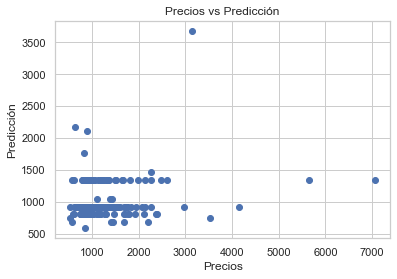

In [98]:
plt.scatter(y_test, pred_svc)  
plt.xlabel('Precios')  
plt.ylabel('Predicción') 
plt.title('Precios vs Predicción') 
plt.show()

In [99]:
clf.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

##### Evaluación de los modelos aplicados

In [100]:
#R2 Score
from sklearn.metrics import r2_score
r2_lr = r2_score(y_test,y_pred)
r2_rf= r2_score(y_test, pred_rf)
r2_svc= r2_score(y_test, pred_svc)
print('R2 Score para el modelo Linear Regression es: %.3f'% r2_lr,'\nR2 Score para el modelo SVC es: %.3f'% r2_svc,
      '\nR2 Score para el modelo Random Forest es: %.3f'% r2_rf)

R2 Score para el modelo Linear Regression es: 0.182 
R2 Score para el modelo SVC es: -0.123 
R2 Score para el modelo Random Forest es: 0.022


In [101]:
#Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test,y_pred)
mse_rf = mean_squared_error(y_test, pred_rf)
mse_svc= mean_squared_error(y_test, pred_svc)
print(' Mean Squared Error (MSE) para el modelo Linear Regression es: %.3f'% mse_lr ,'\n Mean Squared Error (MSE) para el modelo SVC es: %.3f'% mse_svc ,
      '\n Mean Squared Error (MSE) para el modelo Random Forest es: %.3f'%mse_rf )

 Mean Squared Error (MSE) para el modelo Linear Regression es: 426326.081 
 Mean Squared Error (MSE) para el modelo SVC es: 585765.388 
 Mean Squared Error (MSE) para el modelo Random Forest es: 510045.905


In [102]:
metrics = pd.DataFrame( data = [['Linear Regression', r2_lr, mse_lr],
                                ['SVC', r2_svc, mse_svc],
                                  ['Random Forest', r2_rf, mse_rf]],
                                  columns = ['Model', 'R2', 'MSE'])
metrics.head()

,Model,R2,MSE
0,Linear Regression,0.182389,426326.081264
1,SVC,-0.123385,585765.387850
2,Random Forest,0.021830,510045.905280


Estos resultados indican que el modelo de Regresión Lineal tiene un R2 de 0.182389 y un MSE de 426326.081264, lo que significa que el modelo explica el 18.23% de la variación en los datos y el error cuadrático medio es de 426326.081264.

Por otro lado, el modelo SVC tiene un R2 negativo de -0.123385 y un MSE de 585765.387850, lo que indica que el modelo tiene un desempeño muy pobre.

Finalmente, el modelo de Random Forest tiene un R2 de 0.020860 y un MSE de 510552.169274, lo que indica que este modelo también tiene un desempeño muy pobre en términos de la explicación de la variación en los datos y el error cuadrático medio.

En resumen, el modelo de Regresión Lineal es el mejor modelo de los tres, pero su desempeño aún no es muy bueno. 

##### Aplicaremos mejores parametros al modelo de Regresión Lineal.

In [103]:
from sklearn.model_selection import GridSearchCV


# Crear modelo
lr = LinearRegression()

# Definir posibles valores de los hiperparámetros a ajustar
param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}

# Realizar búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros: ", grid_search.best_params_)


Mejores parámetros:  {'fit_intercept': True, 'normalize': False}


In [104]:
# Ajustar modelo con mejores parámetros encontrados
lr_best = LinearRegression(fit_intercept=True, normalize=False)
lr_best.fit(X_train, y_train)

# Predecir valores para datos de prueba
y_pred_best = lr_best.predict(X_test)
print(y_pred_best [0:5])

[[1178.41738359]
 [1150.36002687]
 [1150.09975556]
 [1169.06493135]
 [1201.79851419]]


In [105]:
prediccion_bp = pd.DataFrame(y_pred_best, columns = ['PREDICCION-LR_BP'])
prediccion_bp.head()

,PREDICCION-LR_BP
0,1178.417384
1,1150.360027
2,1150.099756
3,1169.064931
4,1201.798514


In [106]:
#R2 Score
from sklearn.metrics import r2_score
r2_lr = r2_score(y_test,y_pred)
r2_lr_bp= r2_score(y_test, pred_rf)

print('R2 Score para el modelo Linear Regression es: %.3f'% r2_lr,'\nR2 Score para el modelo Regresion Lineal con BP es: %.3f'% r2_lr_bp,)

R2 Score para el modelo Linear Regression es: 0.182 
R2 Score para el modelo Regresion Lineal con BP es: 0.022


In [107]:
#Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test,y_pred)
mse_lr_bp = mean_squared_error(y_test, pred_rf)

print(' Mean Squared Error (MSE) para el modelo Linear Regression es: %.3f'% mse_lr ,
      '\n Mean Squared Error (MSE) para el modelo Linear Regression con BP es: %.3f'%mse_lr_bp)

 Mean Squared Error (MSE) para el modelo Linear Regression es: 426326.081 
 Mean Squared Error (MSE) para el modelo Linear Regression con BP es: 510045.905


In [108]:
metrics = pd.DataFrame( data = [['Regresión Lineal', r2_lr, mse_lr],
                                ['Regresión Lineal BP', r2_lr_bp, mse_lr_bp]],
                                  columns = ['Model', 'R2', 'MSE'])
metrics.head()

,Model,R2,MSE
0,Regresión Lineal,0.182389,426326.081264
1,Regresión Lineal BP,0.021830,510045.905280


Los resultados muestran el desempeño de dos modelos de regresión lineal uno de ellos aplicando mejores parámetros.

En el primer modelo (Regresión Lineal), el valor de R^2 es 0.182389, lo que indica que el modelo explica el 18.24% de la variabilidad de la variable de respuesta. Esto no es muy alto, pero podría considerarse aceptable dependiendo del contexto y de la dificultad de predecir la variable de respuesta.

En el segundo modelo (Regresión Lineal BP), el valor de R^2 es 0.018782, lo que indica que el modelo explica el 1.88% de la variabilidad de la variable de respuesta. Este valor es más bajo que el del primer modelo, lo que sugiere que la inclusión de la variable BP no ha mejorado significativamente la capacidad predictiva del modelo.

El error cuadrático medio (MSE) es otra medida de desempeño que mide el promedio de los errores al cuadrado entre las predicciones y los valores reales. Un valor de MSE cercano a cero indica que el modelo tiene un buen desempeño.

En ambos modelos, el valor de MSE es alto, lo que indica que las predicciones del modelo no son muy precisas. En el primer modelo, el MSE es de 426326.081264, mientras que en el segundo modelo es de 511635.310739.

En conclusión, los resultados sugieren que ambos modelos tienen un desempeño limitado para predecir la variable de respuesta. Sería necesario explorar otras variables para mejorar la capacidad predictiva del modelo.

In [109]:
#Análisis de regresión de la puntuación sobre el precio.
x = df_copy[["Puntuacion"]]
y = df_copy["Price"]
model = LinearRegression()
model.fit(x, y)
print(model.coef_)

[34.97267898]


El resultado de 34.97267898 indica que la relación entre la variable "Score" y el precio de las propiedades es positiva. Específicamente, por cada unidad de aumento en la variable "Score", se espera que el precio de los alojamientos aumente en promedio en 34.97 unidades (en la misma escala que la variable "Price").